# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
%matplotlib inline


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
import csv
import json
# Import API key
from api_keys import weather_api_key
from config import weather_api_key
#print(weather_api_key)
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
#pip install citipy

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

        
        
# Print the city count to confirm sufficient count
len(cities)

621

In [3]:
city_weather = pd.DataFrame({'City': cities, 'Cloudiness': "", 'Country': "", 'Date': "",
                            'Humidity': "", 'Lat': "", 'Lng': "", 'Max Temp': "", 'Windspeed': ""})
city_weather

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,colares,,,,,,,,
1,barrow,,,,,,,,
2,avarua,,,,,,,,
3,hasaki,,,,,,,,
4,kunming,,,,,,,,
...,...,...,...,...,...,...,...,...,...
616,monrovia,,,,,,,,
617,halalo,,,,,,,,
618,seoul,,,,,,,,
619,dubrajpur,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:

#query_url = url + row['City'] + ',' + row['Country'] + '&APPID=' + weather_api_key

record_num = 1
record_set = 1

url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&q="

Beginning Data Retrieval
-----------------------------''')
for index, row in city_weather.iterrows(): 
    Create the query url for the API call
    query_url = url + row['City'] + ',' + row['Country'] + '&APPID=' + weather_api_key
    
    API call
    response = requests.get(query_url).json()
    
    Exception script in case the city is not found by the API call
    try: 
        #Meassage to alert the user that the data is being retrieved
        print(f'Processing Weather Data for Record {record_num} of Set {record_set} | {response["name"]}')
        
        #Input data into the dataframe
        city_weather.loc[index, 'Cloudiness'] = response['clouds']['all']
        city_weather.loc[index, 'Country'] = response['timezone']
        city_weather.loc[index, 'Date'] = response['dt']
        city_weather.loc[index, 'Humidity'] = response['main']['humidity']
        city_weather.loc[index, 'Lat'] = response['coord']['lat']
        city_weather.loc[index, 'Lng'] = response['coord']['lon']
        city_weather.loc[index, 'Max Temp'] = response['main']['temp_max']
        city_weather.loc[index, 'Windspeed'] = response['wind']['speed']
        
        #Increase the record count
        record_num += 1
        
    except (KeyError, IndexError):
        print("City not found....Skipping............")
    
    If statement to handle the API call limits
    if record_num == 51:
        record_set += 1
        record_num = 1
        time.sleep(5)
        
print('''
-----------------------------
Data Retrival Complete
-----------------------------''')


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [115]:
city_weather.to_csv('cities2.csv', index=False)
#cities.to_csv('cities.csv')
cities_df = pd.read_csv ('cities2.csv')
print(cities_df)

          City  Cloudiness  Country          Date  Humidity      Lat  \
0      colares        20.0   3600.0  1.620053e+09      55.0  38.7992   
1       barrow        90.0 -28800.0  1.620053e+09      86.0  71.2906   
2       avarua        90.0 -36000.0  1.620053e+09      73.0 -21.2078   
3       hasaki        20.0  32400.0  1.620053e+09      38.0  35.7333   
4      kunming         0.0  28800.0  1.620053e+09      52.0  25.0389   
..         ...         ...      ...           ...       ...      ...   
616   monrovia        75.0      0.0  1.620054e+09      66.0   6.3005   
617     halalo         NaN      NaN           NaN       NaN      NaN   
618      seoul         0.0  32400.0  1.620054e+09      58.0  37.5683   
619  dubrajpur        90.0  19800.0  1.620054e+09      94.0  23.8000   
620      rocha        64.0 -10800.0  1.620054e+09      52.0 -34.4833   

          Lng  Max Temp  Windspeed  
0     -9.4469     73.00      10.36  
1   -156.7887     15.80       3.27  
2   -159.7750     75.20 

In [116]:
#Clean dataframe to remove cities that were not found
cities_df['Cloudiness'] = cities_df['Cloudiness'].replace('', np.nan)
cities_df = cities_df.dropna()

#Save dataframe
cities_df.to_csv("cities_df.csv", index=False, header=True)

#Preview the dataframe
cities_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,colares,20.0,3600.0,1.620053e+09,55.0,38.7992,-9.4469,73.00,10.36
1,barrow,90.0,-28800.0,1.620053e+09,86.0,71.2906,-156.7887,15.80,3.27
2,avarua,90.0,-36000.0,1.620053e+09,73.0,-21.2078,-159.7750,75.20,8.05
3,hasaki,20.0,32400.0,1.620053e+09,38.0,35.7333,140.8333,59.00,10.36
4,kunming,0.0,28800.0,1.620053e+09,52.0,25.0389,102.7183,66.20,13.42
...,...,...,...,...,...,...,...,...,...
615,mackenzie,90.0,-25200.0,1.620054e+09,87.0,55.2999,-123.1698,35.60,3.44
616,monrovia,75.0,0.0,1.620054e+09,66.0,6.3005,-10.7969,91.40,10.36
618,seoul,0.0,32400.0,1.620054e+09,58.0,37.5683,126.9778,53.60,3.44
619,dubrajpur,90.0,19800.0,1.620054e+09,94.0,23.8000,87.3833,77.00,5.75


In [120]:
cities_df = cities_df[["City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Windspeed", "Country", "Date"]]
cities_df.head(548)
#column_names = ["Lat", "Lng", "Country", "City", "Max Temp", "Humidity", "Cloudiness", "Windspeed", "Date"]
#pd.DataFrame.reindex(columns=column_names) 
#column_names = ["Lat", "Lng", "Country", "City", "Max Temp", "Humidity", "Cloudiness", "Windspeed", "Date"]
#cities_df = cities_df.reindex(columns=column_names)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,colares,38.7992,-9.4469,73.0,55.0,20.0,10.36,3600.0,1.620053e+09
1,barrow,71.2906,-156.7887,15.8,86.0,90.0,3.27,-28800.0,1.620053e+09
2,avarua,-21.2078,-159.7750,75.2,73.0,90.0,8.05,-36000.0,1.620053e+09
3,hasaki,35.7333,140.8333,59.0,38.0,20.0,10.36,32400.0,1.620053e+09
4,kunming,25.0389,102.7183,66.2,52.0,0.0,13.42,28800.0,1.620053e+09
...,...,...,...,...,...,...,...,...,...
610,rietavas,55.7194,21.9311,44.6,65.0,0.0,8.05,10800.0,1.620054e+09
612,toamasina,-18.1667,49.3833,80.6,83.0,75.0,5.75,10800.0,1.620054e+09
613,ewa beach,21.3156,-158.0072,73.4,68.0,20.0,8.05,-36000.0,1.620053e+09
615,mackenzie,55.2999,-123.1698,35.6,87.0,90.0,3.44,-25200.0,1.620054e+09


In [11]:
cities_humid_df = cities_df[["Humidity"]]
cities_humid_df.count()
#cities_Humid_df.drop(cities_Humid_df[cities_Humid_df['Value'] > 100].index, inplace = True)
cities_humid_df.drop(cities_humid_df.loc[cities_humid_df['Humidity'] > 100].index, inplace=True)
cities_humid_df = cities_df.groupby("City").agg({"Humidity": ["max"]})  
print(cities_humid_df)

         Humidity
              max
City             
abalak       46.0
abha         68.0
acapulco     69.0
acarau       76.0
acworth      94.0
...           ...
zanjan       72.0
zermatt      68.0
zhadovka     61.0
zheshart     42.0
zhigansk     99.0

[551 rows x 1 columns]


C:\Users\ICPC\anaconda3\envs\Pythondata\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [121]:
humid_df = cities_df[cities_df["Humidity"]>100].index
clean_df = cities_df.drop(humid_df, inplace = False)
clean_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,colares,38.7992,-9.4469,73.0,55.0,20.0,10.36,3600.0,1.620053e+09
1,barrow,71.2906,-156.7887,15.8,86.0,90.0,3.27,-28800.0,1.620053e+09
2,avarua,-21.2078,-159.7750,75.2,73.0,90.0,8.05,-36000.0,1.620053e+09
3,hasaki,35.7333,140.8333,59.0,38.0,20.0,10.36,32400.0,1.620053e+09
4,kunming,25.0389,102.7183,66.2,52.0,0.0,13.42,28800.0,1.620053e+09


In [122]:
humid_df

Int64Index([], dtype='int64')

In [25]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cities_df.drop([129, 0])
print(clean_city_data)

          City      Lat  Country       Lng  Max Temp  Humidity  Cloudiness  \
1       barrow  71.2906 -28800.0 -156.7887     15.80      86.0        90.0   
2       avarua -21.2078 -36000.0 -159.7750     75.20      73.0        90.0   
3       hasaki  35.7333  32400.0  140.8333     59.00      38.0        20.0   
4      kunming  25.0389  28800.0  102.7183     66.20      52.0         0.0   
5         lebu -37.6167 -14400.0  -73.6500     54.41      77.0        97.0   
..         ...      ...      ...       ...       ...       ...         ...   
615  mackenzie  55.2999 -25200.0 -123.1698     35.60      87.0        90.0   
616   monrovia   6.3005      0.0  -10.7969     91.40      66.0        75.0   
618      seoul  37.5683  32400.0  126.9778     53.60      58.0         0.0   
619  dubrajpur  23.8000  19800.0   87.3833     77.00      94.0        90.0   
620      rocha -34.4833 -10800.0  -54.3333     77.09      52.0        64.0   

     Windspeed          Date  
1         3.27  1.620053e+09  
2

## Inspect the data and remove the cities where the humidity > 100%.
1111----
Skip this step if there are no cities that have humidity > 100%. 

In [113]:
clean_city_data


,City,Lat,Country,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Date
1,barrow,71.2906,-28800.0,-156.7887,15.80,86.0,90.0,3.27,1.620053e+09
2,avarua,-21.2078,-36000.0,-159.7750,75.20,73.0,90.0,8.05,1.620053e+09
3,hasaki,35.7333,32400.0,140.8333,59.00,38.0,20.0,10.36,1.620053e+09
4,kunming,25.0389,28800.0,102.7183,66.20,52.0,0.0,13.42,1.620053e+09
5,lebu,-37.6167,-14400.0,-73.6500,54.41,77.0,97.0,8.43,1.620053e+09
...,...,...,...,...,...,...,...,...,...
615,mackenzie,55.2999,-25200.0,-123.1698,35.60,87.0,90.0,3.44,1.620054e+09
616,monrovia,6.3005,0.0,-10.7969,91.40,66.0,75.0,10.36,1.620054e+09
618,seoul,37.5683,32400.0,126.9778,53.60,58.0,0.0,3.44,1.620054e+09
619,dubrajpur,23.8000,19800.0,87.3833,77.00,94.0,90.0,5.75,1.620054e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

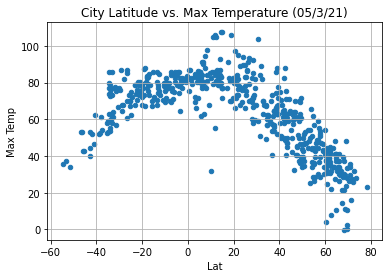

In [154]:
clean_city_data.plot.scatter(x="Lat", y="Max Temp", alpha=1.0)
#plt.scatter(x, y)
plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.title('City Latitude vs. Max Temperature (05/3/21)')
plt.grid()
plt.savefig("Max Temp_vs_Lat.png")
plt.show()

## Latitude vs. Humidity Plot

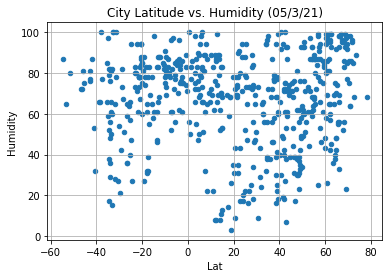

In [174]:
clean_city_data.plot.scatter(x="Lat", y="Humidity", alpha=1.0)
#plt.scatter(x, y)
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.title('City Latitude vs. Humidity (05/3/21)')
plt.grid()
plt.savefig("Humidity_vs_Lat.png")
plt.show()

## Latitude vs. Cloudiness Plot

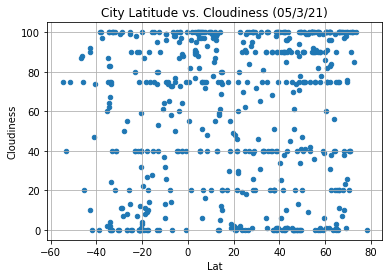

In [173]:
clean_city_data.plot.scatter(x="Lat", y="Cloudiness", alpha=1.0)
#plt.scatter(x, y)
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
plt.title('City Latitude vs. Cloudiness (05/3/21)')
plt.grid()
plt.savefig("Cloudiness_vs_Lat.png")
plt.show()

## Latitude vs. Wind Speed Plot

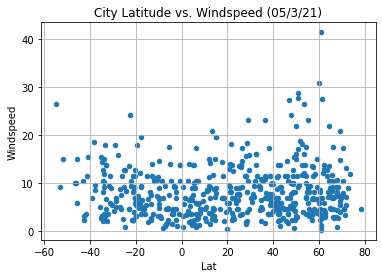

In [172]:
clean_city_data.plot.scatter(x="Lat", y="Windspeed", alpha=1.0)
#plt.scatter(x, y)
plt.xlabel("Lat")
plt.ylabel("Windspeed")
plt.title('City Latitude vs. Windspeed (05/3/21)')
plt.grid()
plt.savefig("Wind_speed_vs_Lat.png")
plt.show()

## Linear Regression

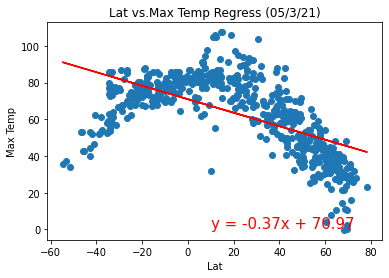

In [155]:
x_values = clean_city_data[("Lat")]
y_values = clean_city_data[("Max Temp")]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,.75),fontsize=15,color="red")
plt.title("Lat vs.Max Temp Regress (05/3/21)")
plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.savefig("Max Temp_vs_Lat_Regress.png")
plt.show()


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [156]:
nhdata=clean_city_data
nhdata=nhdata[nhdata.Lat > 0]

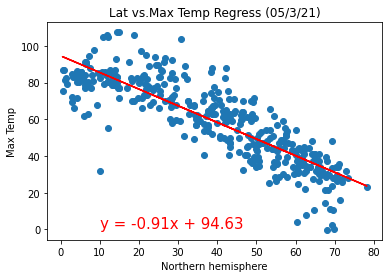

In [157]:
x_values = nhdata[("Lat")]
y_values = nhdata[("Max Temp")]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,.75),fontsize=15,color="red")
plt.title("Lat vs.Max Temp Regress (05/3/21)")
plt.xlabel("Northern hemisphere")
plt.ylabel("Max Temp")
plt.savefig("Max Temp_vs_Lat_Regress.png")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [158]:
shdata=clean_city_data
shdata=shdata[shdata.Lat < 0]


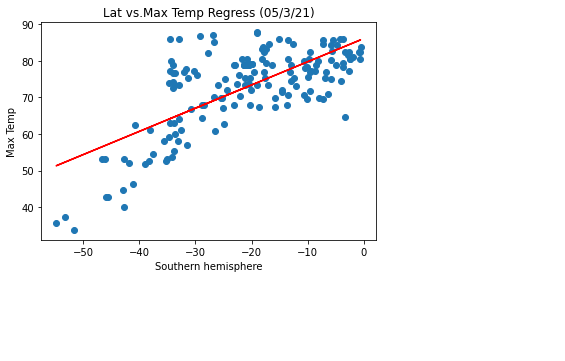

In [159]:
x_values = shdata[("Lat")]
y_values = shdata[("Max Temp")]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,.75),fontsize=15,color="red")
plt.title("Lat vs.Max Temp Regress (05/3/21)")
plt.xlabel("Southern hemisphere")
plt.ylabel("Max Temp")
plt.savefig("Max Temp_vs_Lat_Regress.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [160]:
nhdata=clean_city_data
nhdata=nhdata[nhdata.Lat > 0]

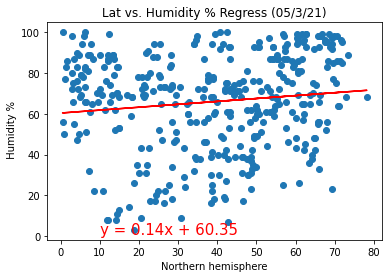

In [161]:
x_values = nhdata[("Lat")]
y_values = nhdata[("Humidity")]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,.75),fontsize=15,color="red")
plt.title("Lat vs. Humidity % Regress (05/3/21)")
plt.xlabel("Northern hemisphere")
plt.ylabel(" Humidity %")
plt.savefig("Humidity_vs_Lat_Regress.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [162]:
shdata=clean_city_data
shdata=shdata[shdata.Lat < 0]

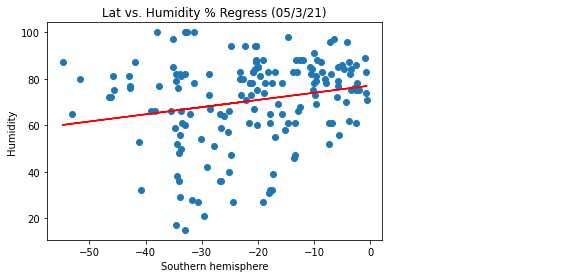

In [163]:
x_values = shdata[("Lat")]
y_values = shdata[("Humidity")]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,.75),fontsize=15,color="red")
plt.title("Lat vs. Humidity % Regress (05/3/21)")
plt.xlabel("Southern hemisphere")
plt.ylabel("Humidity")
plt.savefig("Max Temp_vs_Lat_Regress.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [164]:
nhdata=clean_city_data
nhdata=nhdata[nhdata.Lat > 0]

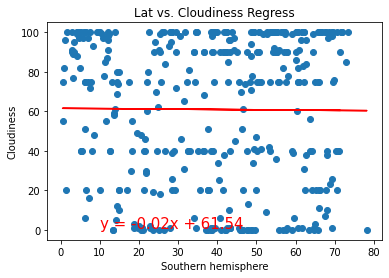

In [165]:
x_values = nhdata[("Lat")]
y_values = nhdata[("Cloudiness")]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,1),fontsize=15,color="red")
plt.title("Lat vs. Cloudiness Regress")
plt.xlabel("Southern hemisphere")
plt.ylabel("Cloudiness")
plt.savefig("Cloudiness_vs_Lat_Regress.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [166]:
shdata=clean_city_data
shdata=shdata[shdata.Lat < 0]

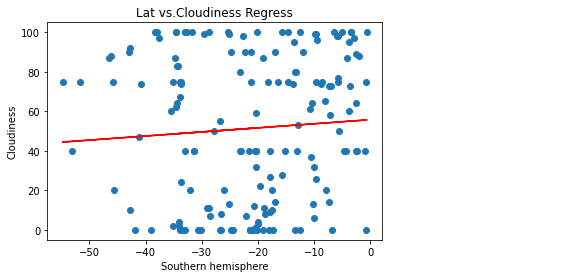

In [167]:
x_values = shdata[("Lat")]
y_values = shdata[("Cloudiness")]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,.75),fontsize=15,color="red")
plt.title("Lat vs.Cloudiness Regress")
plt.xlabel("Southern hemisphere")
plt.ylabel("Cloudiness")
plt.savefig("Cloudiness_vs_Lat_Regress.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [168]:
nhdata=clean_city_data
nhdata=nhdata[nhdata.Lat > 0]

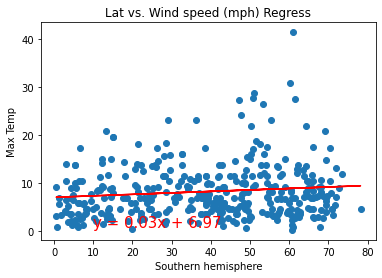

In [169]:
x_values = nhdata[("Lat")]
y_values = nhdata[("Windspeed")]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,.75),fontsize=15,color="red")
plt.title("Lat vs. Wind speed (mph) Regress")
plt.xlabel("Southern hemisphere")
plt.ylabel("Max Temp")
plt.savefig("Max Temp_vs_Lat_Regress.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [170]:
shdata=clean_city_data
shdata=shdata[shdata.Lat < 0]

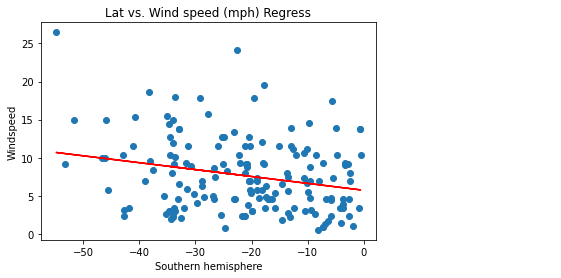

In [171]:
x_values = shdata[("Lat")]
y_values = shdata[("Windspeed")]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,.75),fontsize=15,color="red")
plt.title("Lat vs. Wind speed (mph) Regress")
plt.xlabel("Southern hemisphere")
plt.ylabel("Windspeed")
plt.savefig("Windspeed_vs_Lat_Regress.png")
plt.show()